## Handwritten digits classification using neural network

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import layers, models


In [2]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

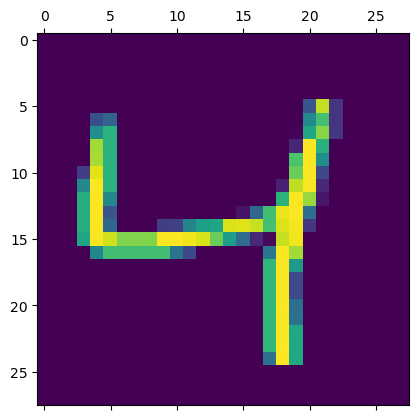

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train / 255   #Scalling the values
x_test = x_test /255

In [15]:
x_train_flattened=x_train.reshape(len(x_train),28*28)  
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

In [17]:
x_test_flattened.shape

(10000, 784)

In [18]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# Create a Sequential model
model = models.Sequential([
    layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4707 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.2663 - accuracy: 0.9255


In [20]:
#Lets evaluate accuracy on test dataset
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9256


[0.2701455056667328, 0.925599992275238]

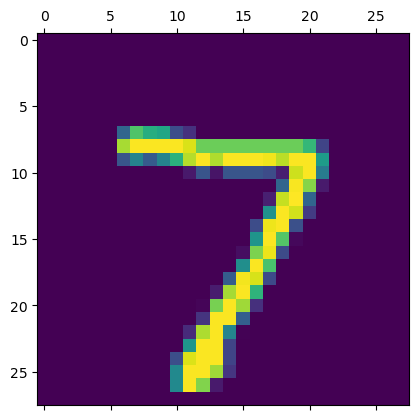

In [21]:
plt.matshow(x_test[0])

In [22]:
model.predict(x_test_flattened)

313/313 [==============================] - 0s 828us/step


array([[3.0795170e-02, 3.0589959e-07, 3.5318583e-02, ..., 9.9982059e-01,
        1.1628261e-01, 6.7566007e-01],
       [4.3428624e-01, 4.6183933e-03, 9.9849117e-01, ..., 6.9085861e-13,
        1.5467010e-01, 1.6000162e-09],
       [4.5481944e-04, 9.9198043e-01, 6.6686255e-01, ..., 1.5052372e-01,
        4.0077597e-01, 4.7357384e-02],
       ...,
       [3.2432104e-06, 3.3493693e-06, 7.5176224e-04, ..., 2.2412270e-01,
        5.0912899e-01, 7.6394552e-01],
       [1.4008766e-04, 1.3945298e-04, 1.2375989e-04, ..., 4.4437675e-05,
        6.7866266e-01, 1.1965139e-04],
       [6.8035610e-03, 4.7268078e-10, 9.7004943e-02, ..., 2.4191515e-08,
        1.5040067e-04, 4.2932311e-07]], dtype=float32)

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 825us/step


array([3.0795170e-02, 3.0589959e-07, 3.5318583e-02, 9.6588784e-01,
       3.9397185e-03, 1.5476049e-01, 1.4506386e-06, 9.9982059e-01,
       1.1628261e-01, 6.7566007e-01], dtype=float32)

In [24]:
np.argmax(y_predicted[0])  #it gives max of array that is predicted

7

In [25]:
y_predicted[0]

array([3.0795170e-02, 3.0589959e-07, 3.5318583e-02, 9.6588784e-01,
       3.9397185e-03, 1.5476049e-01, 1.4506386e-06, 9.9982059e-01,
       1.1628261e-01, 6.7566007e-01], dtype=float32)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] #it argamx too the predicted values
y_predicted_labels[0]

7

In [27]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [28]:
cfm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cfm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    9,    3,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,    9,  902,   23,    7,    4,   13,   12,   51,    3],
       [   3,    0,   11,  926,    0,   24,    3,   12,   24,    7],
       [   1,    1,    3,    2,  913,    0,   14,    4,   10,   34],
       [   8,    2,    1,   29,    6,  783,   16,    8,   33,    6],
       [   7,    3,    2,    2,    7,   11,  921,    2,    3,    0],
       [   1,    5,   20,    8,    6,    0,    0,  956,    3,   29],
       [   8,    6,    5,   19,    9,   26,    9,   12,  874,    6],
       [  10,    7,    1,   11,   26,    8,    0,   27,    7,  912]])>

Text(95.72222222222221, 0.5, 'Actual')

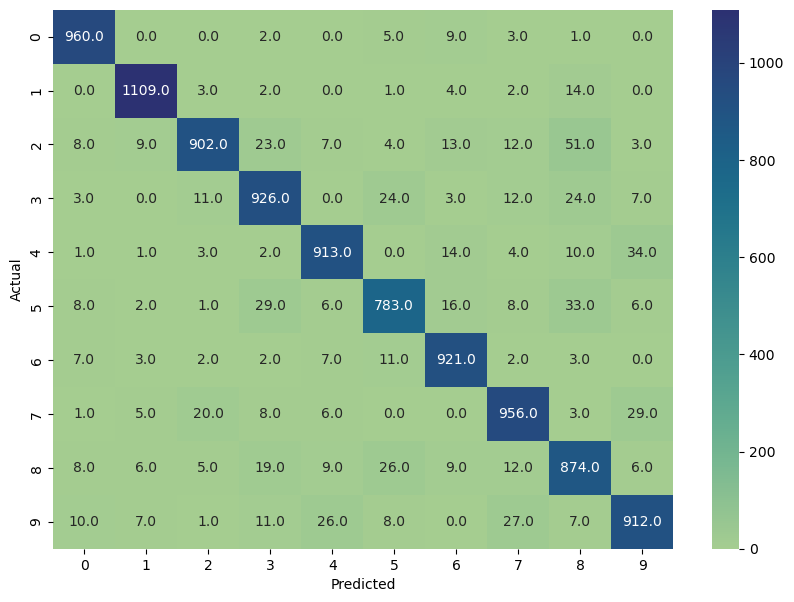

In [29]:
#visualize confussion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cfm,annot = True,fmt='.1f', cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  #we dont need to flatten seperatly, Specify input shape as (28, 28)
    layers.Dense(100, activation="relu"),  # Additional hidden layer for better performance
    layers.Dense(10, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=10)   


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1182 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0501 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0401 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0269 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.020

By increasing epoches and adding one more hidden layer it gives better result

In [31]:
y_predicted2 = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.0795170e-02, 3.0589959e-07, 3.5318583e-02, 9.6588784e-01,
       3.9397185e-03, 1.5476049e-01, 1.4506386e-06, 9.9982059e-01,
       1.1628261e-01, 6.7566007e-01], dtype=float32)

In [32]:
np.argmax(y_predicted2[0])

7

In [34]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2] #it argamx too the predicted values
y_predicted_labels2[0]

7

In [35]:
cfm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)
cfm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    1,    2,    3,    0,    1,    2],
       [   0, 1122,    4,    2,    0,    0,    2,    1,    3,    1],
       [   3,    1, 1001,    9,    1,    0,    3,    6,    7,    1],
       [   0,    0,    1,  993,    0,    3,    0,    5,    3,    5],
       [   2,    0,    2,    0,  961,    2,    6,    2,    1,    6],
       [   2,    0,    0,   11,    1,  868,    3,    0,    5,    2],
       [   7,    2,    2,    1,    1,    3,  939,    0,    3,    0],
       [   2,    3,    6,    3,    0,    0,    0, 1003,    3,    8],
       [   3,    2,    0,    6,    4,    4,    0,    5,  948,    2],
       [   2,    2,    0,    8,    6,    7,    1,    2,    5,  976]])>

Text(95.72222222222221, 0.5, 'Actual')

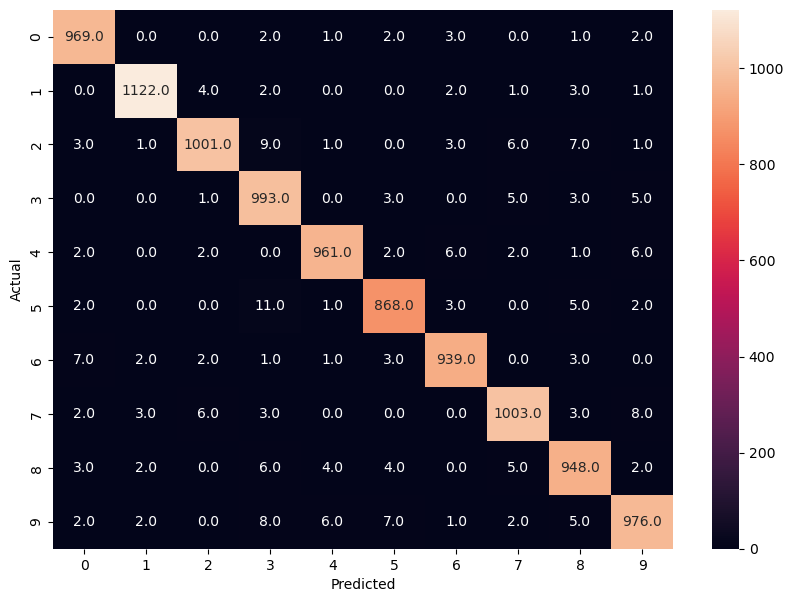

In [36]:
#visualize confussion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cfm2,annot = True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 968us/step - loss: 0.0793 - accuracy: 0.9780


[0.07926618307828903, 0.9779999852180481]

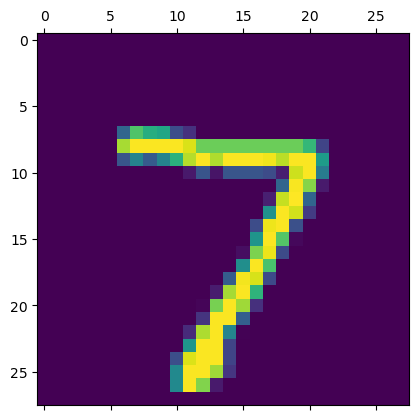

In [38]:
plt.matshow(x_test[0])

In [39]:
model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


array([[2.0075405e-04, 2.5955546e-07, 1.1115302e-02, ..., 9.9999601e-01,
        2.4766833e-02, 5.7433918e-02],
       [2.3733202e-02, 6.8085921e-01, 9.9999982e-01, ..., 6.4149593e-12,
        9.2073746e-02, 3.4436148e-13],
       [3.5093766e-05, 9.9651682e-01, 3.4844805e-02, ..., 2.3606129e-02,
        9.8577350e-02, 3.1323732e-06],
       ...,
       [1.4097314e-11, 1.6752983e-06, 1.4372899e-10, ..., 4.0611818e-01,
        1.7974462e-01, 9.4749939e-01],
       [3.3245804e-03, 3.0971652e-08, 1.7739978e-09, ..., 4.1526511e-07,
        9.8863322e-01, 3.6683418e-06],
       [7.4714005e-02, 1.6917629e-06, 1.6856064e-04, ..., 1.4124558e-10,
        8.9536727e-05, 3.6048487e-08]], dtype=float32)

In [45]:
np.argmax(y_predicted[1])

2

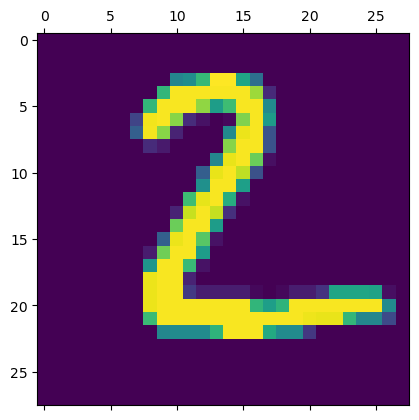

In [46]:
plt.matshow(x_test[1])

# Model giving correct prediction